## Wine Review Project
Data mining on wine review dataset from all over the world.

Witch grapes variety has the most quality/price rateo?
Restrict the search of grapes variety to Italy.
Restrict the search of grapes variety to a specific italian region (Toscany).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# system modules
import sys

path = sys.path[0] # find the path of the current working directory

data_path = '/data/winemag-data_first150k.csv'# <- data CSV

df=pd.read_csv(path+data_path)

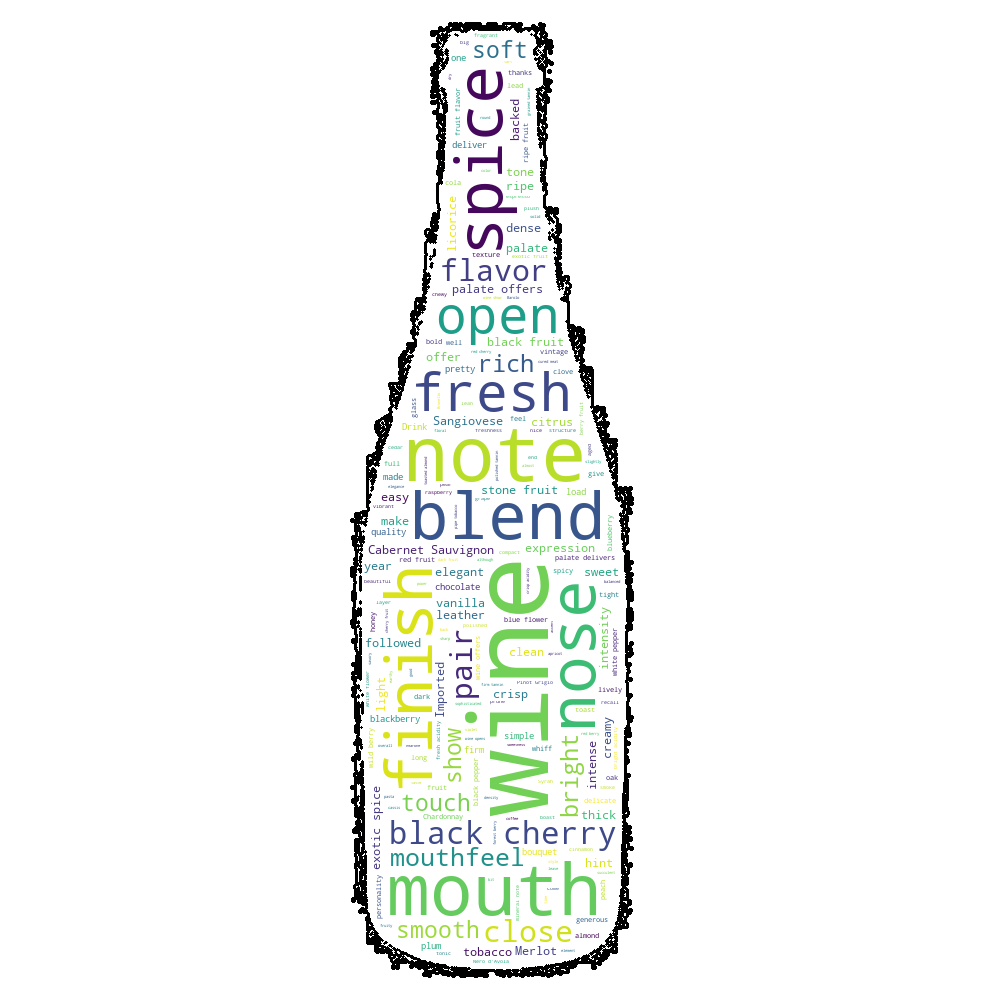

In [4]:
from IPython.display import Image
Image(filename = path + "/img/wine-logo.png", width=500, height=600)

##### import libraries for the project

In [5]:
# show examples from dataframe
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
# Give me the information of the dataset
# reveal:
#    - all colums names,
#    - how many Non-null values each column has,
#    - reveal the data type used for each column  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [7]:
cols = list(df.columns) # extract column names

In [8]:
# Give me : count, mean, std, min, max and 25%,50%,75% percentiles for each column that has numerical values
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [12]:
# check witch columns has null-values
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

/home/usrname/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Different grape varieties for each county (first 14th)')

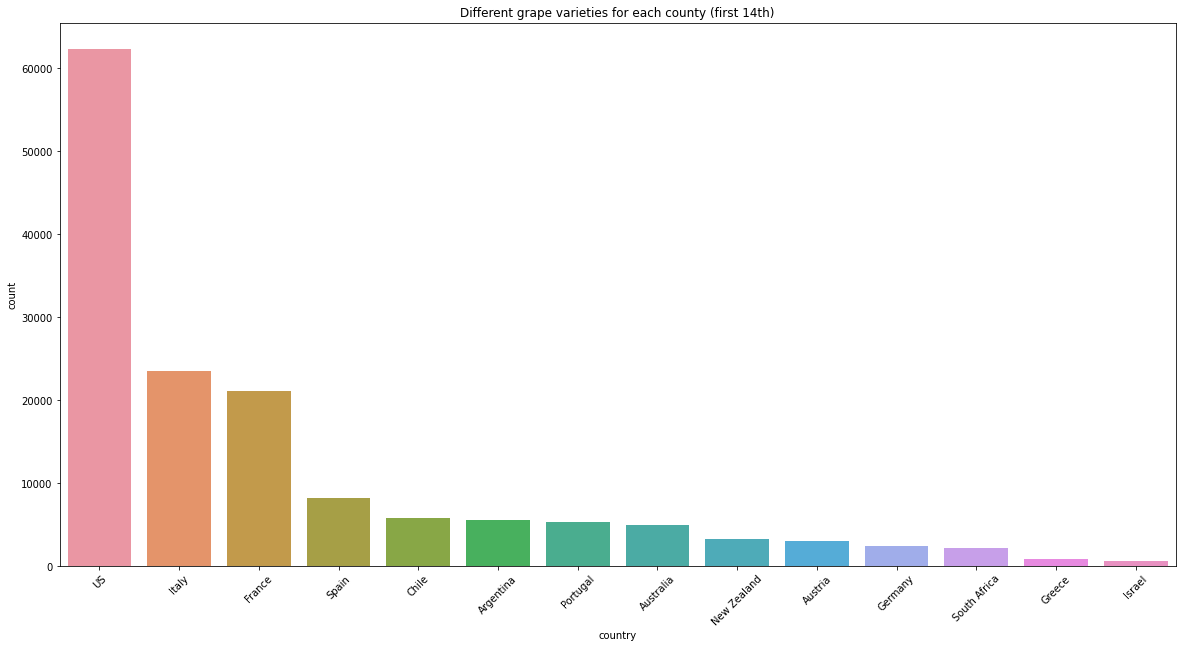

In [13]:
# plot the counts the occurrences of the counts of different grape varieties for each country of the first 14th countries
plt.figure( figsize=(20,10))
ax = sns.countplot(df.country, order = df.country.value_counts().index[:14] )     
plt.xticks(rotation=45)
plt.title('Different grape varieties for each county (first 14th)')

In [14]:
# create a new dataframe called df2 with just the first 14 countries
# in the order of the counts of different grape varieties

order = df['country'].value_counts().index  # extract the index
order = order[:14]         # take the first 14 values

df2 = df[df.country.isin(order)] # create new dataframe
df2.country.unique() # print out all different countries in the new dataset 

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Argentina',
       'Australia', 'Portugal', 'Israel', 'South Africa', 'Greece',
       'Chile', 'Germany', 'Austria'], dtype=object)

Text(0.5, 1.0, 'Score points distribution among all countries ')

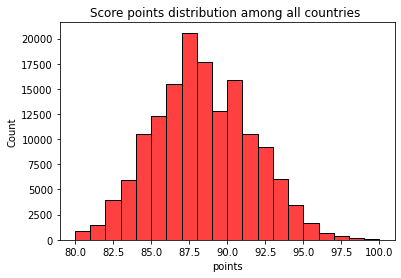

In [15]:
# calculate the score point distribution among all the first 14th countries 
# who has the most records

sns.histplot(df2.points, bins = 20 , color ='red')
plt.title("Score points distribution among all countries ")

In [16]:
# calculate the mean price for each of the most important countries
gr_df = df2.groupby("country").points.mean()
gr_df # print out "gr_df" the group by country data frame

country
Argentina       85.996093
Australia       87.892475
Austria         89.276742
Chile           86.296768
France          88.925870
Germany         88.626427
Greece          86.117647
Israel          87.176190
Italy           88.413664
New Zealand     87.554217
Portugal        88.057685
South Africa    87.225421
Spain           86.646589
US              87.818789
Name: points, dtype: float64

In [17]:
# gr_df2 is like gr_df but the data is normalized
# normalization of x_i - x_mean for each i
gr_df2 = df2.groupby("country").points.mean() - df2.points.mean()
gr_df2 = gr_df2.sort_values(ascending=False)
gr_df2

country
Austria         1.374624
France          1.023752
Germany         0.724309
Italy           0.511546
Portugal        0.155567
Australia      -0.009643
US             -0.083329
New Zealand    -0.347901
South Africa   -0.676697
Israel         -0.725928
Spain          -1.255529
Chile          -1.605351
Greece         -1.784471
Argentina      -1.906025
Name: points, dtype: float64

/home/usrname/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'This graph show that: Austria, France, Germany and Italy has in general the most score for quality wine among all other countries')

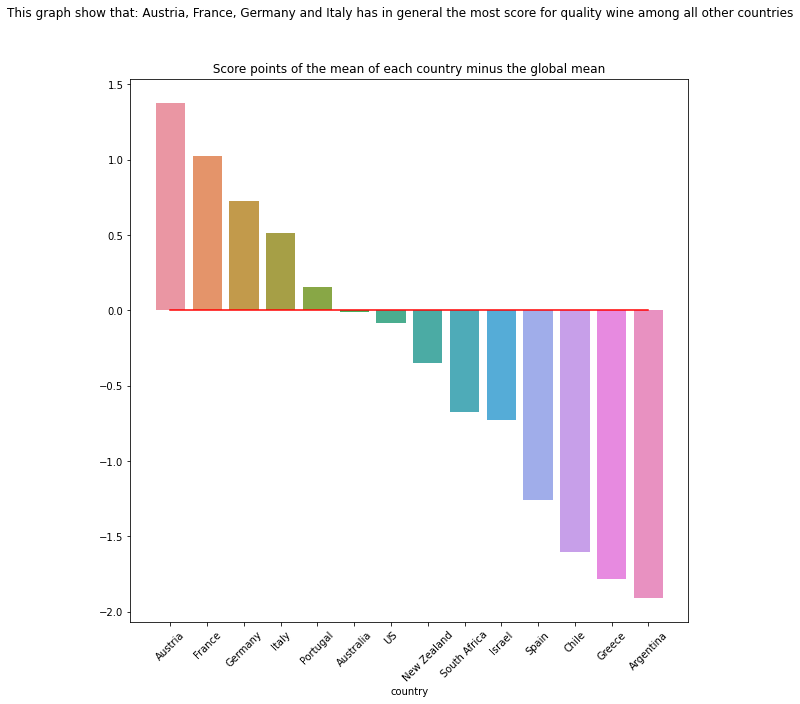

In [18]:
plt.figure( figsize=(10,10) )
sns.set_palette("muted")
sns.barplot(gr_df2.index, gr_df2.values)
plt.xticks(rotation=45)
plt.plot(np.arange(len(gr_df2)) , np.zeros(len(gr_df2)) , color ='red')
plt.title(' Score points of the mean of each country minus the global mean ')
plt.suptitle('This graph show that: Austria, France, Germany and Italy has in general the most score for quality wine among all other countries')

#### Italy Wine Review Price Analysis

In [19]:
# Restrict the data analysis to Italy
# create a new dataframe called "df_ita" from df2

df_ita = df[df['country']=='Italy'] # select the dataframe

In [20]:
df_ita['variety'].nunique() # print out the number of different grapes variety in Italy in this data set

177

In [21]:
df_ita.dropna(subset=['price'],inplace=False) # drop all raw with nan value on price column

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
35,35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
37,37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
39,39,Italy,"This bright, savory wine delivers aromas and f...",Riserva,90,29.0,Tuscany,Chianti Classico,NaN,Red Blend,Castello di Monterinaldi
...,...,...,...,...,...,...,...,...,...,...,...
150824,150824,Italy,This 100% Cortese wine has a slight fizz and a...,NaN,87,18.0,Piedmont,Gavi,NaN,Cortese,Principessa Gavia
150920,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora


In [22]:
df_ita.price.mean() # calculate price mean in euro for italian wine

37.54791311754685

In [23]:
# counts the occurrences records for each italian region
var=df_ita.groupby('variety')
varind=var.count().sort_values(by='price',ascending=False).head(40).index
province_of_italy = df_ita[df_ita.variety.isin(varind)]
province_of_italy.province.value_counts()

# you shuold see that Tuscany has 7086 records

Tuscany               7086
Piedmont              3981
Veneto                3897
Sicily & Sardinia     2162
Northeastern Italy    1605
Southern Italy        1257
Central Italy         1215
Lombardy               556
Italy Other             43
Northwestern Italy       7
Name: province, dtype: int64

In [24]:
df_ita # show me the new dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
32,32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
35,35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
37,37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
...,...,...,...,...,...,...,...,...,...,...,...
150920,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
150922,150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora


In [25]:
# create a new dataframe called "itapp" in witch I divide each wine
# in 4 different price range: low, middle, high, luxury
# the range are taken without any prior consideration
# low price each wine bottle that cose 20 or less
# middle  > 20   and  < 35
# high    > 35   and  < 50
# luxury  > 50 


df_ita=df_ita.groupby('variety')['points','price'].mean() # group by variety and select points and price columns 

df_ita.loc[df_ita['price'] <=20 , 'cost'] = 'low'
df_ita.loc[(df_ita['price'] >20)&(df_ita['price'] <= 35) , 'cost'] = 'middle'
df_ita.loc[(df_ita['price'] >35)&(df_ita['price'] <= 50) , 'cost'] = 'high'
df_ita.loc[df_ita['price'] >50 , 'cost'] = 'luxury'



<ipython-input-25-47ac7f97defb>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ita=df_ita.groupby('variety')['points','price'].mean() # group by variety and select points and price columns


In [26]:
df_ita.cost.value_counts()

middle    75
low       57
high      29
luxury    14
Name: cost, dtype: int64

In [27]:
df_ita.sort_values(by='points',ascending=False, inplace=True)

In [28]:
df_ita.head(3)

,points,price,cost
variety,,,
Sirica,93.000000,36.500000,high
Roviello,92.500000,28.000000,middle
Cabernet Franc,92.016393,84.745098,luxury


In [29]:
def normalization(df):
    """ 
    generate a new score from points / price 
    and after, normalize all in a range score of [0,100]
    """
    new_df = pd.DataFrame()
    new_df['rateo'] = df['points'] / df['price']
    new_df['cost'] = df['cost']
    #new_df['name'] = df['region_1']
    MAX = new_df['rateo'].max()
    new_df['score'] = (( new_df['rateo'] ) / MAX ) * 100
    new_df.sort_values( by='score' , ascending=False , inplace=True)
    return new_df

/home/usrname/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, ' As we can see from the plot, the best rateo quality/price of the Italian wine is reserved by Pigato quality')

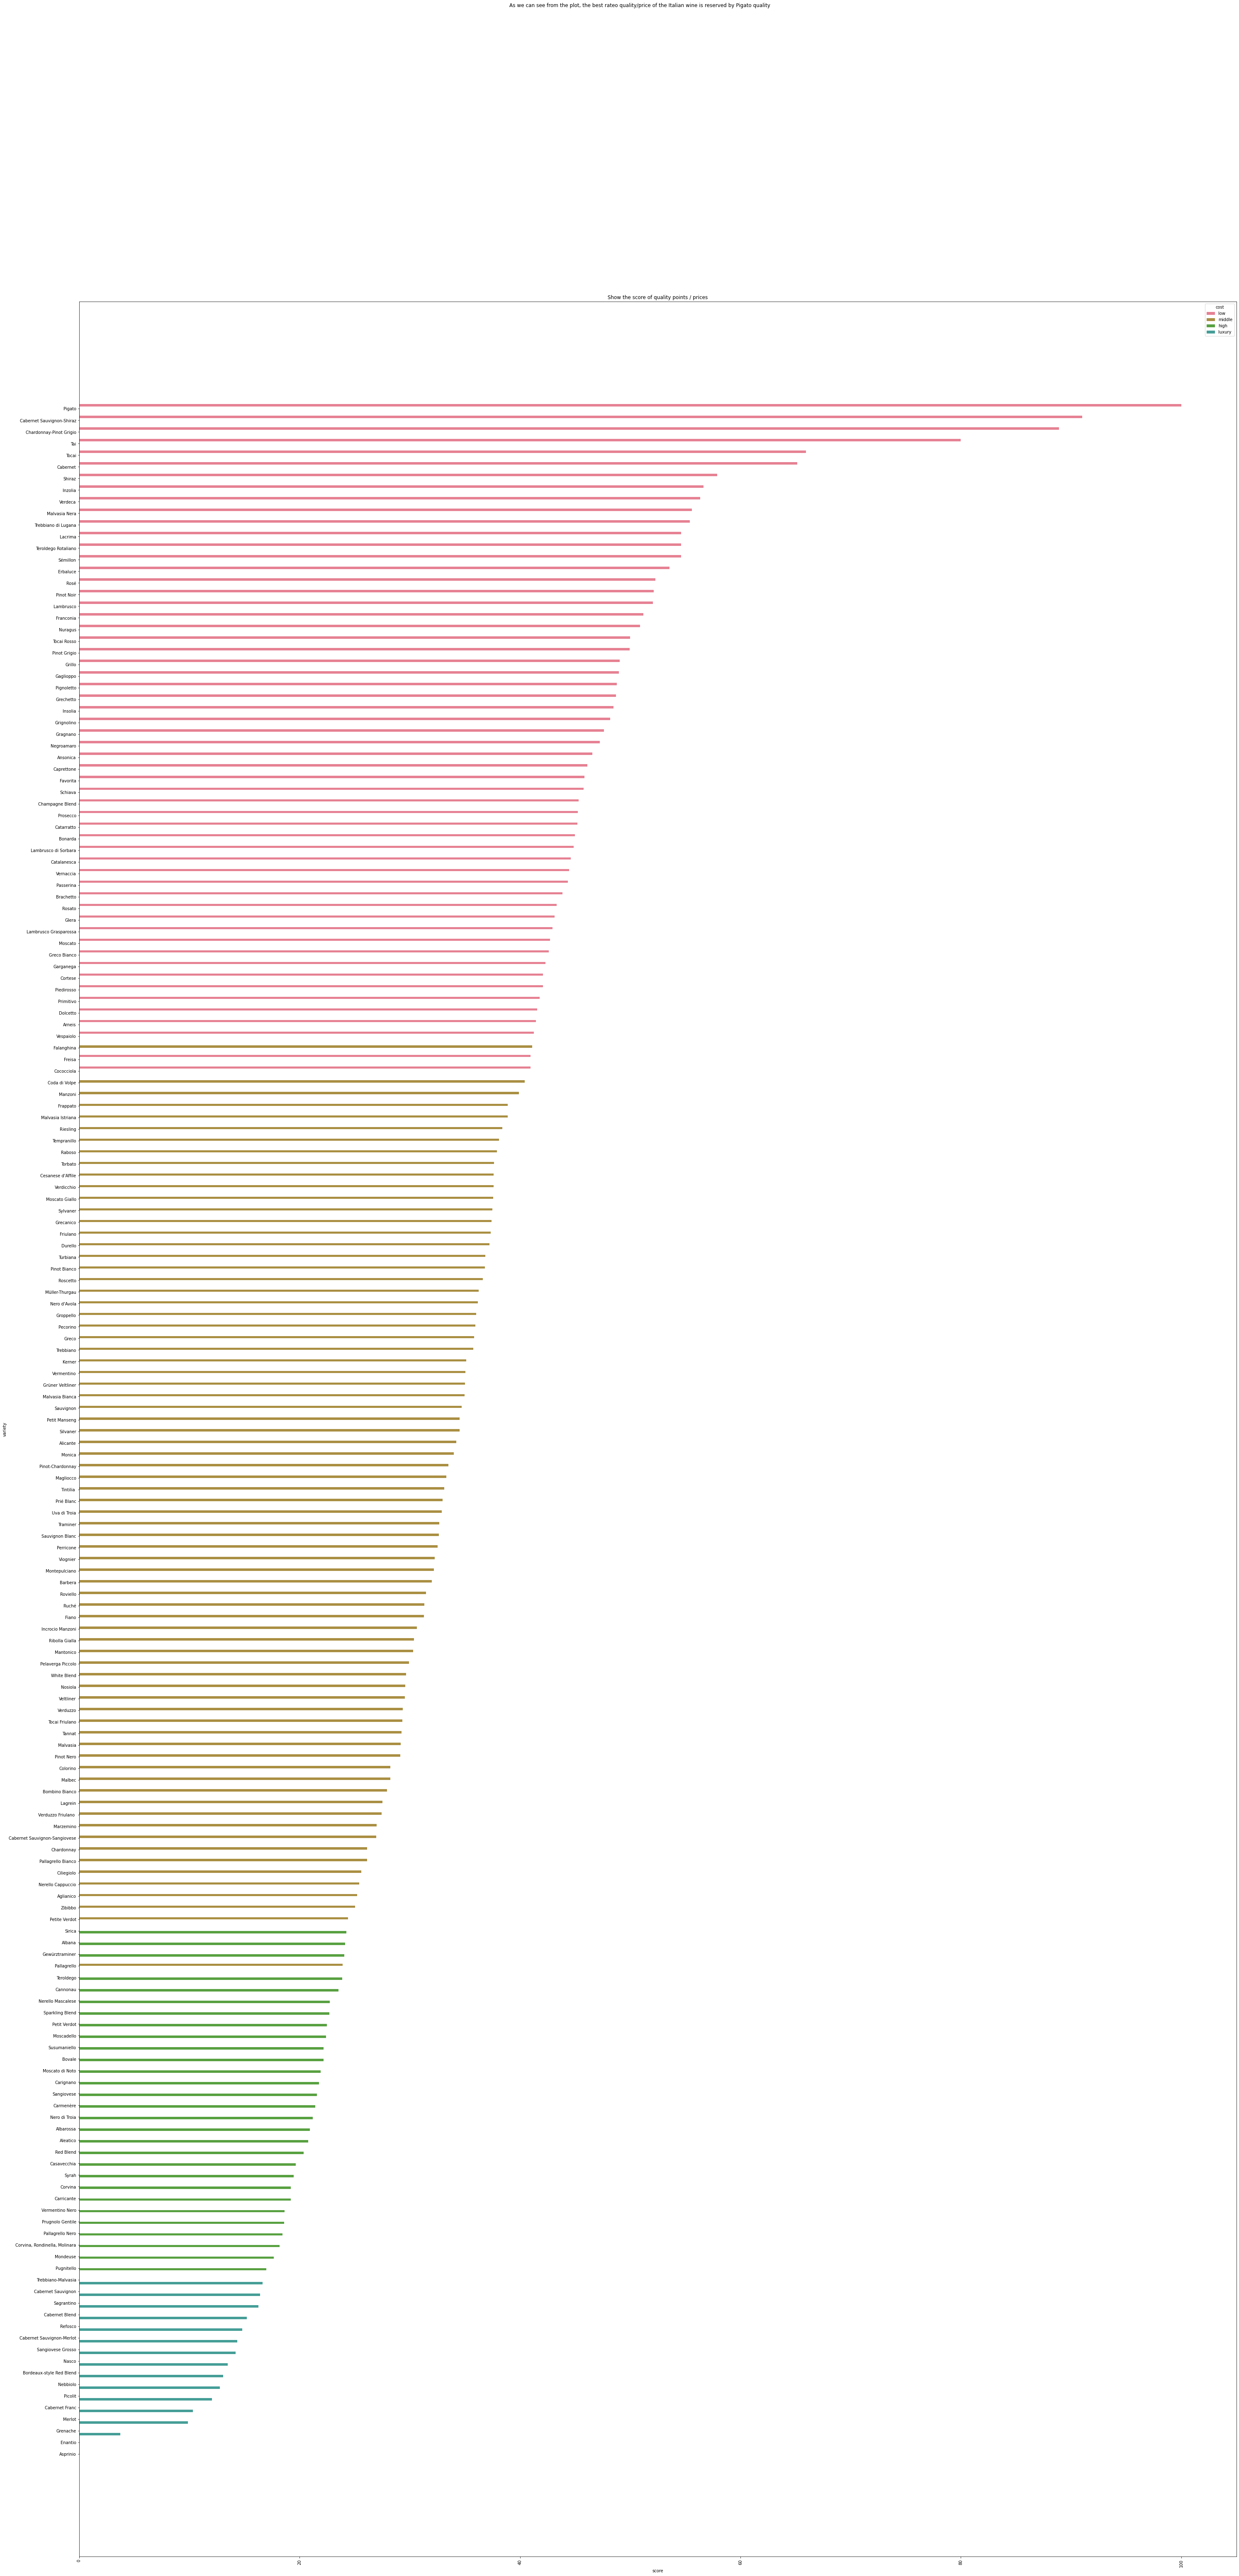

In [33]:
# PLOT
plot_df_ita = normalization(df_ita)
plt.figure( figsize=(50,100) )
sns.set_palette("husl")
sns.barplot( plot_df_ita.score, plot_df_ita.index, hue = plot_df_ita.cost)
plt.xticks( rotation = 90 )
plt.plot( np.zeros( len(df_ita) ), np.arange( len(df_ita) ) , color ='red')
plt.title(' Show the score of quality points / prices ')
plt.suptitle(" As we can see from the plot, the best rateo quality/price of the Italian wine is reserved by Pigato quality")